In [1]:
#Visualise Drift lines

In [2]:

#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")





Welcome to JupyROOT 6.16/00
Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Function to turn file into arrays
def Get_drift_line_arrays(filename):
    file = open(filename, 'r')
    lines = file.readlines()

    #print len(lines)
    #print lines[2]

    rIN_cm = float(lines[10].split('\t\t')[0])
    zIN_cm = float(lines[10].split('\t\t')[1])

    DriftTime_us_list = []
    r_cm_list = []
    z_cm_list = []

    DriftTime_us_list.append(0.0)
    r_cm_list.append(rIN_cm)
    z_cm_list.append(zIN_cm)

    for i in range(0,len(lines)):
        if lines[i].startswith('#'):
            continue
        elif lines[i].startswith('*'):
            print lines[i]
        elif lines[i].startswith('0') or lines[i].startswith('1') or lines[i].startswith('2')\
        or lines[i].startswith('3') or lines[i].startswith('4') or lines[i].startswith('5')\
        or lines[i].startswith('6') or lines[i].startswith('7') or lines[i].startswith('8')\
        or lines[i].startswith('9'):
            a = lines[i].split('\t\t')
            #print a
            DriftTime_us_list.append(float(a[2]))
            r_cm_list.append(float(a[3]))
            z_cm_list.append(float(a[4]))
        else:
            continue
    return np.asarray(r_cm_list), np.asarray(z_cm_list), np.asarray(DriftTime_us_list)


def Get_file_length(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    return len(lines)


def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us


print "\n\t...Done!"


	...Done!


**IF TIME ELAPSED



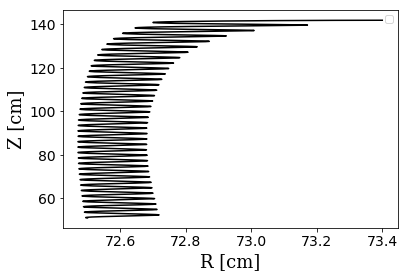

In [7]:

#pop=-2
filename="SingleDriftLineCalc_TimeStep_0.1us_r72.5cm_z51.0cm_0824.txt"
#"/home/rossiter/LZ_EDM_200501/DiffusionAnalysis_0505/SingleDriftLineCalc_.5cm_r26.25cm_z02.0cm_0504.txt"
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(filename)
#plt.plot(r_cm_array, z_cm_array, '.k', label='Drift line')
plt.plot(r_cm_array, z_cm_array, '-k')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xlim(29.8,30.2)
#plt.ylim(144,146.2)
plt.legend(loc='best')



In [5]:
"""
./eDriftCalc/SingleDriftLineCalc_exe 8.75 2 0507 .5 .
./eDriftCalc/SingleDriftLineCalc_exe 17.5 2 0507 .5 .
./eDriftCalc/SingleDriftLineCalc_exe 26.25 2 0507 .5 .
./eDriftCalc/SingleDriftLineCalc_exe 35 2 0507 .5 .
./eDriftCalc/SingleDriftLineCalc_exe 43.75 2 0507 .5 .
"""

'\n./eDriftCalc/SingleDriftLineCalc_exe 8.75 2 0507 .5 .\n./eDriftCalc/SingleDriftLineCalc_exe 17.5 2 0507 .5 .\n./eDriftCalc/SingleDriftLineCalc_exe 26.25 2 0507 .5 .\n./eDriftCalc/SingleDriftLineCalc_exe 35 2 0507 .5 .\n./eDriftCalc/SingleDriftLineCalc_exe 43.75 2 0507 .5 .\n'